<a href="https://colab.research.google.com/github/CamdenBert/CSCI290/blob/main/StrokePrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lets practice loading and exploring some data!

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://github.com/mbrudd/csci290/raw/main/data/stroke.csv')

In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df["stroke"].mean()

0.0487279843444227

In [6]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


In [7]:
df["stroke"].value_counts(normalize = True)

,proportion
stroke,
0,0.951272
1,0.048728


In [8]:
df["stroke"].unique()

array([1, 0])

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Axes: xlabel='age', ylabel='stroke'>

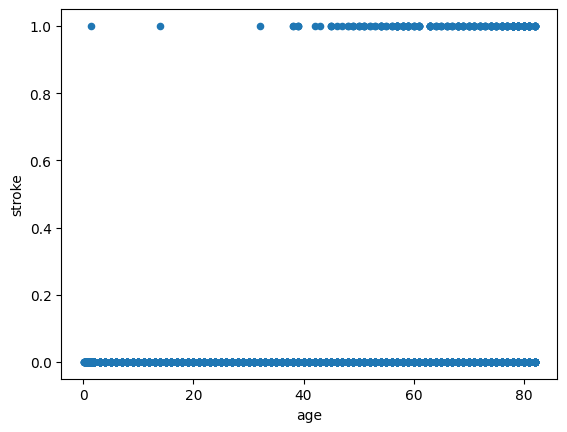

In [11]:
df.plot.scatter(x="age", y="stroke")

In [12]:
df["age"].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


In [13]:
df["age_cat"]=pd.cut(df["age"],bins = [0,25,45,61,100],labels = ["young","adult","middle_age","old"])

In [14]:
df["age_cat"].value_counts()

,count
age_cat,
adult,1325
young,1293
middle_age,1264
old,1228


In [15]:
df.groupby("heart_disease")["stroke"].mean()

,stroke
heart_disease,
0,0.041787
1,0.170290


In [16]:
df.groupby(["heart_disease", "hypertension","ever_married"])["stroke"].mean()

heart_disease  hypertension  ever_married
0              0             No              0.008923
                             Yes             0.049283
               1             No              0.159091
                             Yes             0.117949
1              0             No              0.130435
                             Yes             0.164021
               1             No              0.444444
                             Yes             0.163636
Name: stroke, dtype: float64

In [17]:
df.groupby("age_cat")["stroke"].mean()

<ipython-input-17-ff85a4b5087e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_cat")["stroke"].mean()


,stroke
age_cat,
young,0.001547
adult,0.008302
middle_age,0.051424
old,0.139251


In [18]:
df["prediction"] = df["age"] > 25

In [19]:
df["prediction"].value_counts()

,count
prediction,
True,3817
False,1293


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
cm = confusion_matrix(df["stroke"], df["prediction"])
cm

array([[1291, 3570],
       [   2,  247]])

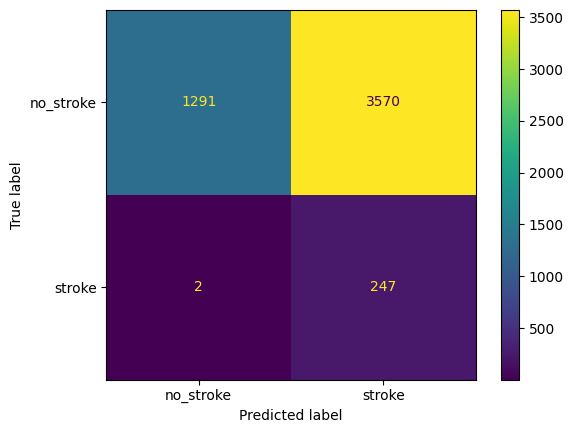

In [22]:
ConfusionMatrixDisplay(cm , display_labels = ["no_stroke","stroke"]).plot()

In [23]:
tn, fp, fn, tp =  confusion_matrix(df["stroke"], df["prediction"]).ravel()
tn, fp, fn, tp

(1291, 3570, 2, 247)

In [24]:
import sklearn.metrics as metrics

In [25]:
metrics.recall_score(df["stroke"], df["prediction"])

0.9919678714859438

In [26]:
tp / (tp + fn)

0.9919678714859438

In [27]:
metrics.precision_score(df["stroke"], df["prediction"])

0.06471050563269583

In [28]:
tp / (tp + fp)

0.06471050563269583

In [29]:


def precision_vs_recall( threshold ):
  df["prediction"] = df["age"] > threshold
  return metrics.precision_score( df["stroke"], df["prediction"]), metrics.recall_score( df["stroke"], df["prediction"])



In [30]:
precision_vs_recall( 61 )

(0.13925081433224756, 0.6867469879518072)

In [31]:
precisions = []
recalls = []
thresholds = range(0,82)
for threshold in thresholds:
  precision, recall = precision_vs_recall( threshold )
  precisions.append( precision )
  recalls.append( recall )

In [32]:
pr = pd.DataFrame( {
    "threshold": thresholds,
    "precision": precisions,
    "recall": recalls
})


In [33]:
pr.tail()

,threshold,precision,recall
77,77,0.209115,0.313253
78,78,0.210332,0.228916
79,79,0.215054,0.160643
80,80,0.198276,0.092369
81,81,0.160714,0.036145


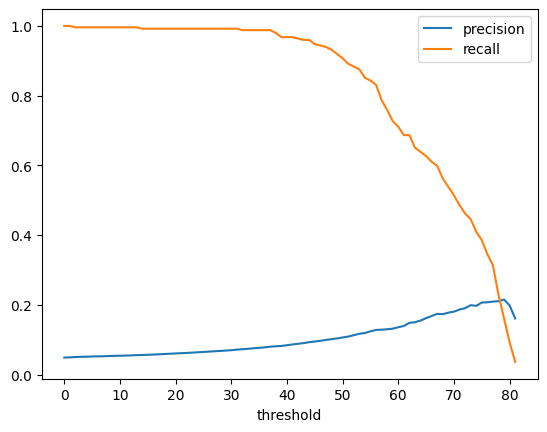

In [34]:
pr.plot( x="threshold", y=["precision","recall"]);

In [35]:
def get_fpr(threshold):
  df["prediction"] = df["age"] > threshold
  tn, fp, fn, tp =  confusion_matrix(df["stroke"], df["prediction"]).ravel()
  fpr = fp / (fp + tn)
  return fpr


In [36]:
fprs = []
for threshold in thresholds:
  fpr = get_fpr( threshold )
  fprs.append( fpr )


In [37]:
pr["fpr"] = fprs

In [38]:
pr.head()

,threshold,precision,recall,fpr
0,0,0.048728,1.000000,1.000000
1,1,0.049190,1.000000,0.990125
2,2,0.050253,0.995984,0.964205
3,3,0.050726,0.995984,0.954742
4,4,0.051081,0.995984,0.947747


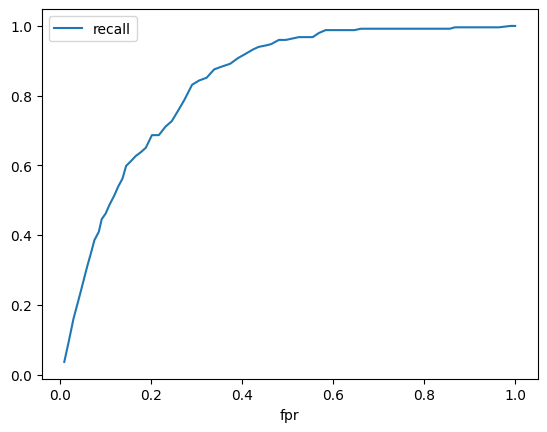

In [39]:
pr.plot( x="fpr", y="recall");

In [ ]:
#homework

In [40]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.2)



In [41]:
train_set.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_cat', 'prediction'],
      dtype='object')

In [42]:
train_set=train_set[["gender", "age", "hypertension","heart_disease", "smoking_status", "stroke"]]

In [43]:
test_set=test_set[["gender", "age", "hypertension","heart_disease", "smoking_status", "stroke"]]

In [44]:
x_train=train_set[["gender", "age", "hypertension","heart_disease", "smoking_status"]]
y_train=train_set["stroke"]

In [45]:
x_test=test_set[["gender", "age", "hypertension","heart_disease", "smoking_status"]]
y_test=test_set["stroke"]

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4088 entries, 2771 to 4768
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4088 non-null   object 
 1   age             4088 non-null   float64
 2   hypertension    4088 non-null   int64  
 3   heart_disease   4088 non-null   int64  
 4   smoking_status  4088 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 191.6+ KB


In [49]:
num_attributes = x_train.select_dtypes(include = ['int64', 'float64']).columns
cat_attributes = x_train.select_dtypes(include = ['object']).columns

In [50]:
transformers = [
    ('num', StandardScaler(), num_attributes),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attributes)
]
col_transformer = ColumnTransformer(transformers=transformers)

In [51]:
Pipeline = Pipeline(steps =[('pre', col_transformer), ('clf', DecisionTreeClassifier(max_depth=3))])

In [53]:
cross_val_score(Pipeline, x_train, y_train, cv=5, scoring="accuracy")

array([0.95110024, 0.94987775, 0.95110024, 0.95226438, 0.95226438])

In [54]:
model = Pipeline.fit(x_train, y_train)
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'hypertension', 'heart_disease'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'smoking_status'], dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [56]:
predictions = Pipeline.predict(x_test)

In [57]:
cm = confusion_matrix(y_test, predictions)
cm

array([[970,   0],
       [ 52,   0]])